In [1]:
import pandas as pd
import os
from statistics import mean
import matplotlib.pyplot as plt
import funkcije
import copy

pot_plitka = os.getcwd()
pot_globoka =  os.path.join(pot_plitka, 'podatkovna_baza')
pot_sahisti = os.path.join(pot_plitka, 'sahisti')

Preden začnemo z analizo podatkov opazimo, da so nekatera imena v podatkovni bazi podvojena; primer je Garry Kasparov ter Gary Kasparov. Do tega pride, ker so občasno imena v FIDE podatkovni bazi zapisana z kakšno črko razlike ali pa z dodatnim/odvečnim drugim imenom.

Ker pa si želimo, da podatke, ki očitno pripadajo istemu šahistu analiziramo kot take, bomo vse .csv datoteke, za katere menimo, da predstavljajo istega šahista, združili. Najprej zberemo imena, za katera mislimo, da pripadajo isti osebi v seznam seznamov imen.

In [2]:
# ekvivalence = [['Sadler, Matthew', 'Sadler, Matthew D'],['Dominguez Perez, Lenier', 'Dominguez Perez, Leinier'],['Kasparov, Gary', 'Kasparov, Garry'], ['Bologan, Victor', 'Bologan, Viktor'], ['Bruzon, Lazaro', 'Bruzon Batista, Lazaro'], ['Dreev, Alexey', 'Dreev, Aleksey'], ['Harikrishna, Pentala', 'Harikrishna, P'], ['Iturrizaga, Eduardo', 'Iturrizaga Bonelli, Eduardo'], ['Ivanchuk, Vassily', 'Ivanchuk, Vasyl'], ['Kobalia, Mikhail', 'Kobalija, Mihail'], ['Mamedyarov, Shakhriyar', 'Mamedyarov, Shakhriyaz'], ['Narayanan S L', 'NarayananSL'], ['Polgar, Judit (GM)', 'Polgar, Judit'], ['Shankland, Sam', 'Shankland, Samuel', 'Shankland, Samuel L']]
# nova_imena = [ime[0] for ime in ekvivalence]

# def zdruzevalnik(lokacija_csv_1, lokacija_csv_2):
#     csv_1_df = pd.read_csv(lokacija_csv_1)
#     csv_2_df = pd.read_csv(lokacija_csv_2)
#     zdruzen_df = pd.concat([csv_1_df, csv_2_df])
#     zdruzen_df['pravi_datum'] = pd.to_datetime(zdruzen_df['datum'], format='%m-%Y')
#     urejen_df = zdruzen_df.sort_values(by= 'pravi_datum')
#     urejen_df = urejen_df.drop(columns = 'pravi_datum')
#     return urejen_df

# for ekvivalentna_imena in ekvivalence:
#     prihodnje_ime = ekvivalentna_imena[0]
#     #Naslednje vrstice na ustrezen način spremenijo sahisti.csv.
#     sahisti_prebrano = pd.read_csv(pot_sahisti)
#     indeksi_za_izbris = []
#     for indeks, (ime, leto_rojstva) in sahisti_prebrano.iterrows():
#         if ime in ekvivalentna_imena and ime != ekvivalentna_imena[0]:
#             indeksi_za_izbris.append(indeks)
#     sahisti_spremenjeno = sahisti_prebrano.drop(indeksi_za_izbris)
#     sahisti_spremenjeno.to_csv(pot_sahisti, index=False)
#     #naslednjih par vrstic dzruzi DataFrame ter jih pretvori v en .csv
#     for ime in ekvivalentna_imena:
#         if ime != prihodnje_ime:
#             zdruzen_df = zdruzevalnik(funkcije.ime_v_pot(prihodnje_ime), funkcije.ime_v_pot(ime))
#             zdruzen_df.to_csv(funkcije.ime_v_pot(prihodnje_ime), index=False)
#             os.remove(funkcije.ime_v_pot(ime))
# for ime in nova_imena:
#     sahistov_df = pd.read_csv(funkcije.ime_v_pot(ime))


Odlično, sedaj smo opravili z podvojenimi (ter v enem primeru potrojenimi) podatki.

Analizirali bomo naslednje:
- pri kateri starosti šahisti dosežejo svoj največji ELO (ter ali je ta podatek odvisen od tega kako dober je šahist)
- vpliv nacionalnosti to kdaj šahist doseže svoj največji ELO
- korelacija med ratingom (število točk ELO) in rang (katero mesto zaseda šahist na lestvici najboljših 100)

Zanima nas pri kateri starosti šahisti dosežejo svoj vrhunec. Postopek, da pridobimo to informacijo bo naslednji:
1. Ustvarili bomo kopijo seznama sahisti ter v to kopijo shranili podatke o tem pri kateri starosti šahist doseže svoj največji ELO rating; podobno bomo naredili tudi z podatkom pri kateri starosti šahist doseže svoj največji indeks na lestvici najboljših 100 šahistov. Ta podatka nista nujno enakovredna, zaradi rating inflationa ([relevanten wikipedia snippet](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details)).
2. Statistično analizirali zbrano.
3. Zbrane podatke grafično prikazali.

Naš prvi korak bo, da analiziramo ELO šahista v odvisnosti od starosti šahista. To bomo storili tako, da za vsakega šahista, o katerim imamo informacije, izračunamo rating pri določeni starosti ter te podatke predstavimo z diagramom.

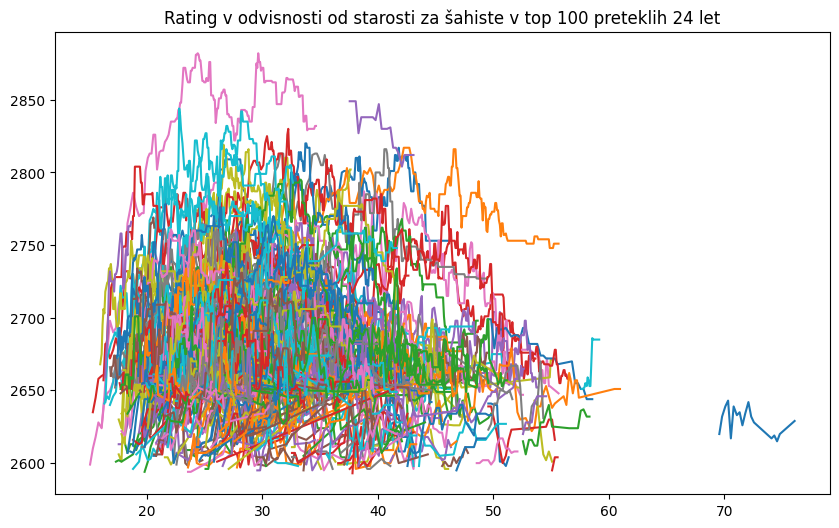

In [3]:
#Napišimo funkcijo, ki vrne strukturo vsebujočo informacije o šahistih, ki so bili v top k-mestih.
def podatki_top_nekaj(k):
    podatki_sahistov_v_top_nekaj = {}
    sahisti = pd.read_csv(pot_sahisti, index_col= 'Ime')
    for ime, vrstica in sahisti.iterrows():
        if ime == 'Leto rojstva\'' or ime == 'Leto rojstva':
            pass
        else:
            podatki = pd.read_csv(funkcije.ime_v_pot(ime))
            for indeks, vrstica2 in podatki.iterrows():
                if vrstica2.iloc[3] <= k:
                    podatki_sahistov_v_top_nekaj[(ime, int(vrstica['Leto rojstva']))] = podatki
    return podatki_sahistov_v_top_nekaj
#funkcija vrne slovar, kjer nabor (ime, leto_rojstva) kaže na podatke dotičnega šahista, prebrane s programom pandas

plt.figure(figsize=(10,6))
for kljucni_nabor, podatki in podatki_top_nekaj(100).items():
    #Seznam podatkov o datumih nadomestimo z seznamom podatkov starosti posameznega šahista
    podatki_starost = [round(funkcije.datum_v_float(datum) - kljucni_nabor[1],2) for datum in podatki['datum']]
    plt.plot(podatki_starost, podatki['rating'], label = kljucni_nabor[0])
plt.title('Rating v odvisnosti od starosti za šahiste v top 100 preteklih 24 let')
plt.show()

Diagram žal ni najbolj berljiv. Kako pa se obnaša povprečni šahist v naši populaciji?

V zgornji celici smo izluščili informacije o ELO ratingov šahistov ob starostih, za celotno populacijo šahistov. Morda pa bi dobili bolj berljive informacije, če bi enako naredili za celotno populacijo šahistov, za katere imamo informacije, ter nato te podatke povprečili.

Pri tej starosti povprečni šahist v naši populaciji doseže svoj najvišji rating: 31. 
Ta rating je 2703.


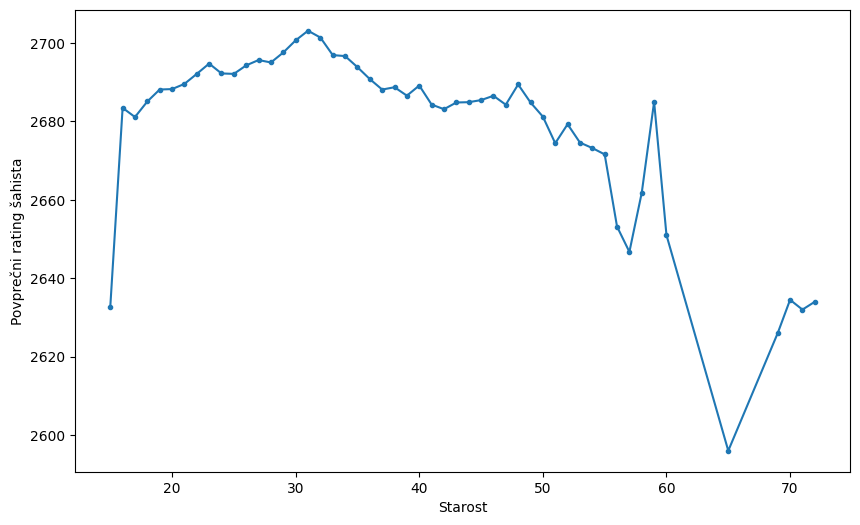

In [4]:
#Ker nimamo podatkov o ratingu vsakega izmed šahistov za vsako starost, morda ker starosti še niso dosegli, morda ker pri določeni starosti niso bili med najboljšimi 100 šahisti,
#ali pa ker so to starost dosegli pred letom 2000, bomo do podatkov o povprečju prišli na naslednji način.
def obrezovalec(slovar):
    #ker v funkciji povprecje_v_populaciji(n) pridobivamo podatke za različne demografike bomo prej ali slej naleteli na demografiko, ki ne bo imela nobenega 73-letnika
    #(najstarejši šahist za katerega zajamemo podatke je Viktor Krochnoi pri rosnih 73 letih). Da bodo grafi, ki jih rišemo bolj reprezentativni bo ta funkcija izbrisala vse vnose slovarja.
    #ki imajo ničelne vrednosti
    return {kljuc : vrednost for kljuc, vrednost in slovar.items() if vrednost != 0}

#Funkcija sprejme populacijo (top n šahistov) ter za vse igralce v populaciji pridobi rating pri vseh moznih starostih.
#Nato pridobljene podatke povpreci, tako da vsoto podatkov o ELO ratingu za vsako starost deli s št. podatkov.
#Nato odstrani vse starosti, za katere podatkov nismo prejeli ter vrne slovar, kjer kljuci predstavljajo starost, vrednosti pa povprecni ELO.


def kalkulator_povprecja(slovar):
    povprecje = {i: 0 for i in range(15, 74)}
    for starost in slovar:
        vsota = sum(slovar[starost])
        dolzina = len(slovar[starost])
        if dolzina != 0:
            povprecje[starost] = round(vsota / dolzina, 2)
        else:
            pass
    return obrezovalec(povprecje)

def povprecje_v_populaciji(n):
    kolekcija_elo_pri_dani_starosti = {i: [] for i in range(15, 74)}
    for sahist, leto_rojstva in podatki_top_nekaj(n):
        sahistov_record = pd.read_csv(funkcije.ime_v_pot(sahist), index_col = 'datum')
        for datum, vrstica in sahistov_record.iterrows():
            leto = int(datum[3::])
            if leto - leto_rojstva >= 15 and leto - leto_rojstva <= 73:
                kolekcija_elo_pri_dani_starosti[leto - leto_rojstva].append(vrstica['rating'])

    return kalkulator_povprecja(kolekcija_elo_pri_dani_starosti)

#Funkcija vrne par velikostni_ekstrem (seznam) ter najvisji (int), kjer je najvisji enak najvisjemu ratingu, ki ga v povprecju dosezejo sahisti
#iz populacije top n, ter je velikostni_ekstrem seznam starosti, pri katerih ta maksimum dosezejo.
def maksimum_v_povprecju_populacije(informacije, n):
    velikostni_ekstrem = []
    najvisji = max(list(povprecje_v_populaciji(n).values()))
    for starost, rating_pri_starosti in informacije.items():
        if rating_pri_starosti == najvisji:
            velikostni_ekstrem.append(starost)
    return velikostni_ekstrem, int(najvisji)

povprecje_v_populaciji_100 = povprecje_v_populaciji(100)
maksimum_v_populaciji_100 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_100, 100)[0]
najvisji_rating_v_populaciji_100 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_100, 100)[1]

formatirani_ekstrem_100 = ' ,'.join(f'{stevilo}' for stevilo in maksimum_v_populaciji_100)
print(f'Pri tej starosti povprečni šahist v naši populaciji doseže svoj najvišji rating: {formatirani_ekstrem_100}. \nTa rating je {najvisji_rating_v_populaciji_100}.')


pandas_prikaz_top_100 = pd.Series(povprecje_v_populaciji_100)

plt.figure(figsize=(10,6))

pandas_prikaz_top_100.plot(kind = 'line', marker = '.')
plt.xlabel('Starost')
plt.ylabel('Povprečni rating šahista')
plt.show()

Morda pa nas naše elitistične težnje vodijo do tega, da bi si radi ogledali še podatke le o najboljših izmed najboljših. Poglejmo si iste informacije na populaciji šahistov, ki so v svoji karieri dosegli mesto med najboljšimi 5 šahisti na FIDE lestvici.

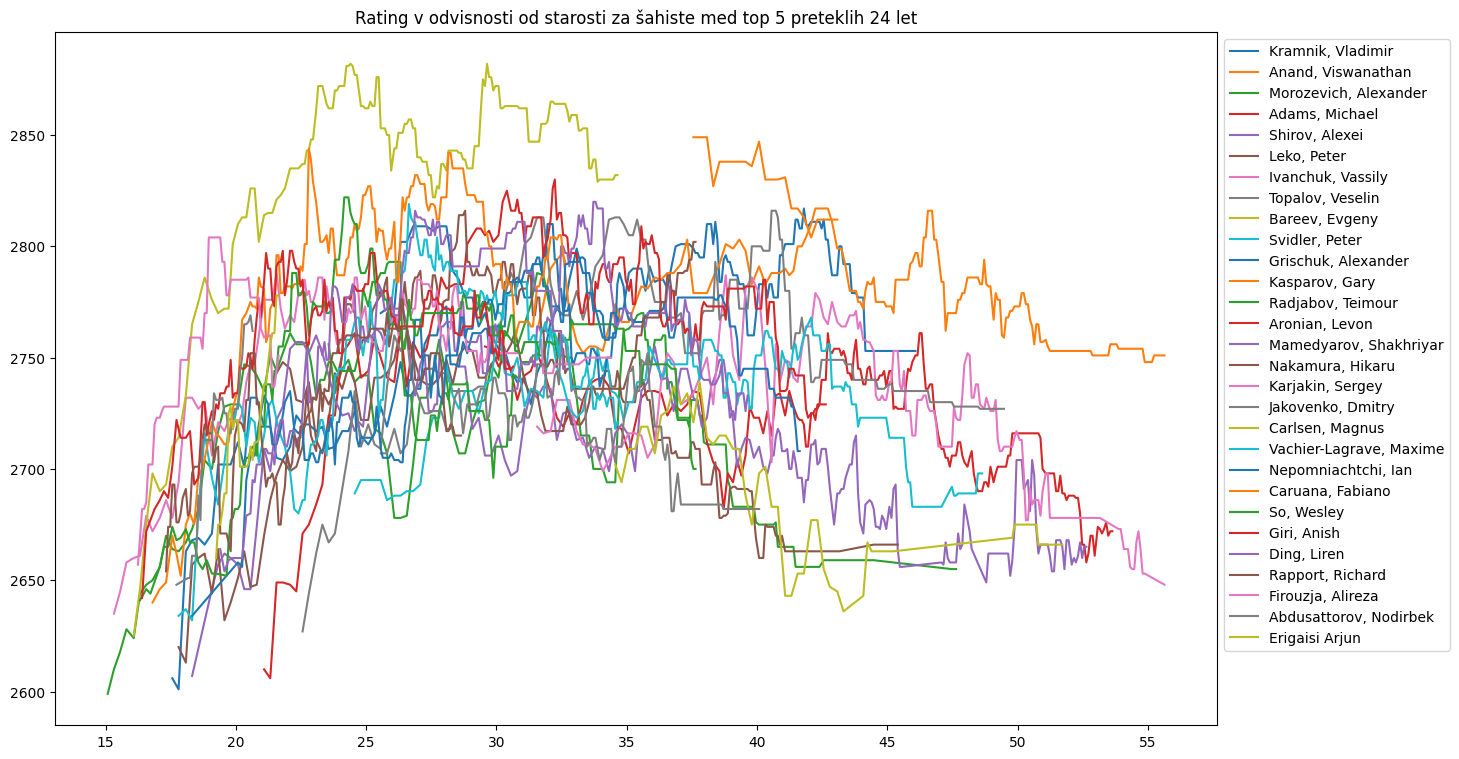

In [5]:
plt.figure(figsize=(15,9))
for kljucni_nabor, podatki in podatki_top_nekaj(5).items():
    #Seznam podatkov o datumih nadomestimo z seznamom podatkov starosti posameznega šahista
    podatki_starost = [round(funkcije.datum_v_float(datum) - kljucni_nabor[1],2) for datum in podatki['datum']]
    plt.plot(podatki_starost, podatki['rating'], label = kljucni_nabor[0])
plt.title('Rating v odvisnosti od starosti za šahiste med top 5 preteklih 24 let')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

Pri tej starosti povprečni šahist, ki je dosegel mesto med najboljšimi petimi šahisti na svetu, doseže svoj najvišji rating: 28. 
Ta rating je 2772.


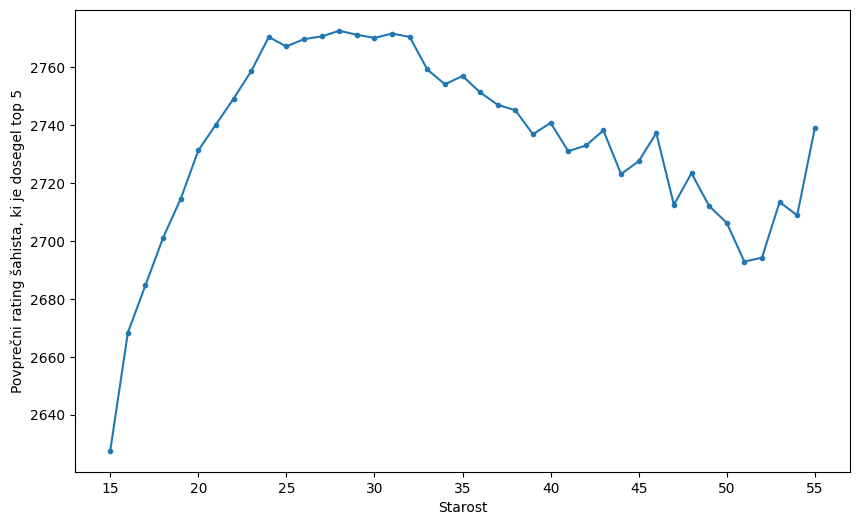

In [6]:
povprecje_v_populaciji_5 = povprecje_v_populaciji(5)
maksimum_v_populaciji_5 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_5, 5)[0]
najvisji_rating_v_populaciji_5 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_5, 5)[1]

formatirani_ekstrem_5 = ' ,'.join(f'{stevilo}' for stevilo in maksimum_v_populaciji_5)
print(f'Pri tej starosti povprečni šahist, ki je dosegel mesto med najboljšimi petimi šahisti na svetu, doseže svoj najvišji rating: {formatirani_ekstrem_5}. \nTa rating je {najvisji_rating_v_populaciji_5}.')

pandas_prikaz_top_5 = pd.Series(povprecje_v_populaciji_5)

plt.figure(figsize=(10,6))

pandas_prikaz_top_5.plot(kind = 'line', marker = '.')

plt.xlabel('Starost')
plt.ylabel('Povprečni rating šahista, ki je dosegel top 5')
plt.show()

Kaj pa le tisti, ki imajo v neki točki v času najvišji ELO na svetu?

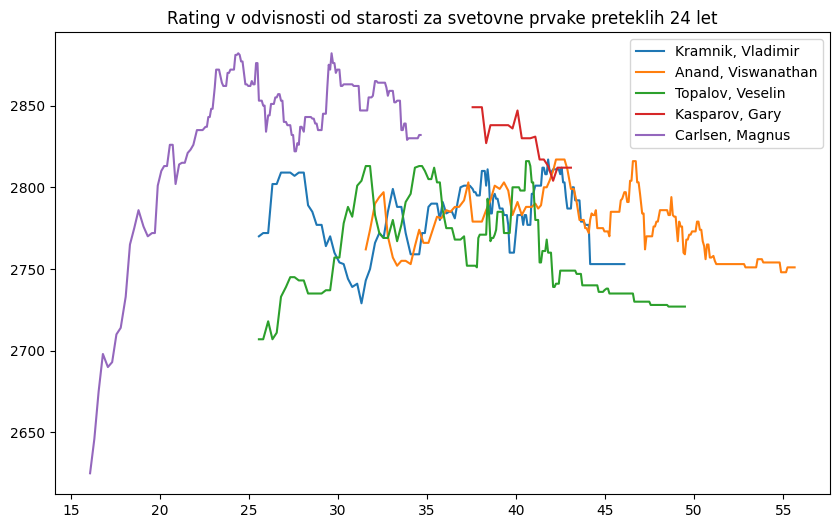

In [7]:
plt.figure(figsize=(10,6))
for kljucni_nabor, podatki in podatki_top_nekaj(1).items():
    #Seznam podatkov o datumih nadomestimo z seznamom podatkov starosti posameznega šahista
    podatki_starost = [round(funkcije.datum_v_float(datum) - kljucni_nabor[1],2) for datum in podatki['datum']]
    plt.plot(podatki_starost, podatki['rating'], label = kljucni_nabor[0])
plt.title('Rating v odvisnosti od starosti za svetovne prvake preteklih 24 let')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

Pri tej starosti povprečni šahist, ki je dosegel prvo mesto na svetu, doseže svoj najvišji rating: 24. 
Ta rating je 2873.


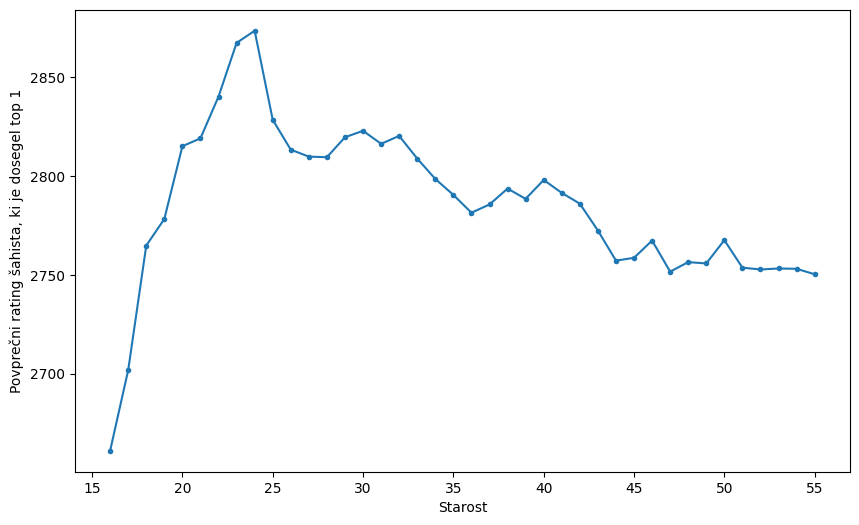

In [8]:
povprecje_v_populaciji_1 = povprecje_v_populaciji(1)
maksimum_v_populaciji_1 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_1, 1)[0]
najvisji_rating_v_populaciji_1 = maksimum_v_povprecju_populacije(povprecje_v_populaciji_1, 1)[1]

formatirani_ekstrem_1 = ' ,'.join(f'{stevilo}' for stevilo in maksimum_v_populaciji_1)
print(f'Pri tej starosti povprečni šahist, ki je dosegel prvo mesto na svetu, doseže svoj najvišji rating: {formatirani_ekstrem_1}. \nTa rating je {najvisji_rating_v_populaciji_1}.')

pandas_prikaz_top_1 = pd.Series(povprecje_v_populaciji_1)

plt.figure(figsize=(10,6))

pandas_prikaz_top_1.plot(kind = 'line', marker = '.')

plt.xlabel('Starost')
plt.ylabel('Povprečni rating šahista, ki je dosegel top 1')
plt.show()

Iz čiste radovednosti narišimo grafe povprečnega šahista v naši podatkovni bazi, povprečnega šahista, ki je dosegel rating med top 5, ter šahista, ki je dosegel rang 1, na isti diagram.

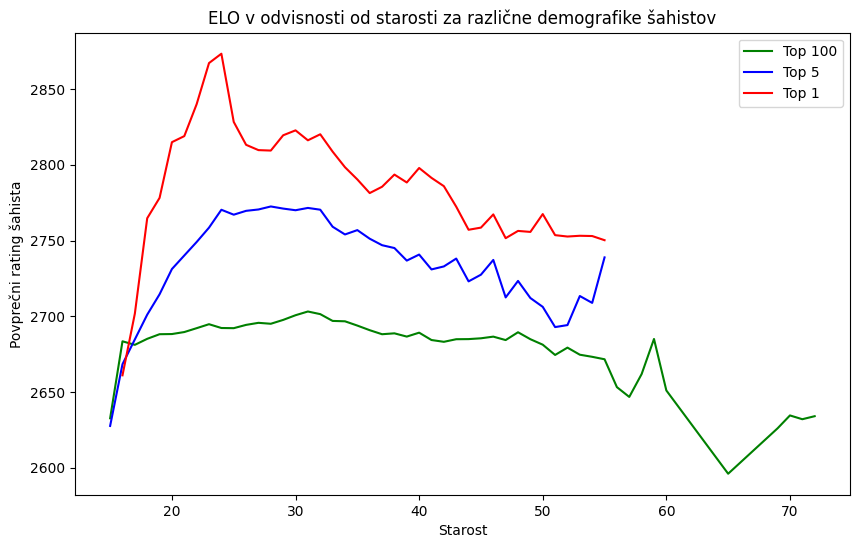

In [9]:
plt.figure(figsize=(10,6))

pandas_prikaz_top_100.plot(label='Top 100', color='green')
pandas_prikaz_top_5.plot(label='Top 5', color='blue')
pandas_prikaz_top_1.plot(label='Top 1', color='red')

plt.xlabel('Starost')
plt.ylabel('Povprečni rating šahista')
plt.title('ELO v odvisnosti od starosti za različne demografike šahistov')

plt.legend()
plt.show()

Preden nadaljujemo pa je treba dodati, da naša statistična analiza ni brez svojih primanjkljajev. Ker so nam na voljo le podatki o šahistih med letom 2000 in letom 2024, so zbrani podatki o šahistih, ki so bili na lestvici tudi pred letom 2000, nereprezentativni. Seveda, mar res pričakujemo, da se je (kot lahko vidimo na grafu 'Rating v odvisnosti od starosti za svetovne prvake preteklih 24 let') Gary Kasparov kar pojavil z ELO ratingom čez 2800?

|Demografika| Najvišji rating | Starost pri najvišjem ratingu|
|-----------|-----------------|------------------------------|
|Povprečje populacije top 100 šahistov| 2703 | 31 |
|Povprečje populacije top 5 šahistov| 2772 | 28 |
|Povprečje populacije top 1 šahistov| 2873 | 24 |

Vidimo, da se razvoj šahistovega ELO ratinga skozi njegovo življenje zelo razlikuje, če vemo, da dotični šahist doseže mesto med najboljšimi 100 (zelena črta), najboljšimi 5 (morda črta), ter najboljši med vsemi (rdeča črta). Ne samo da 'boljši' šahisti dosegajo svoj maksimum pri višjih ratingih, kar je samoumevno, tudi dosegajo ga kot mlajši, in to ne za zanemarljivo količino.

To je seveda popolnoma pričakovano, saj pričakujemo neko korelacijo med ratingom in rang, posledično dejstvo, da igralec doseže odličen razultat, kot je mesto med najboljšimi petimi oz. najboljše mesto, gotovo vpliva na igralčev ELO rating skozi kariero.

Do sedaj pa se še nismo poslužili enega izmed podatkov, ki smo jih zbrali. To je namreč država, pod zastavo katere igra posamezni šahist.
Pojavljajo se nam naslednja vprašanja:
* Kakšen delež šahistov predstavljajo posamezne države?
* Ali obstaja povezava med šahistovo državo ter njegovim rangom oz. ratingom?

Lotimo se najprej prve točke.

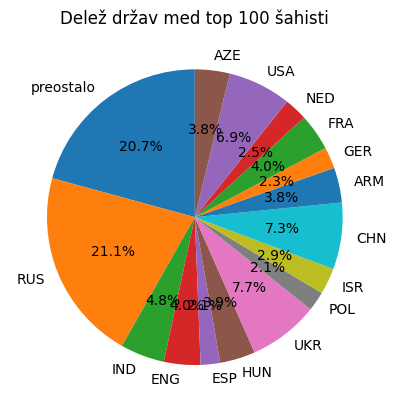

In [10]:
#Ker se zdi pravično, da bi zbrani podatki o deležih šahistov iz posamezne države, odražali 'prisotnost' te države na lestvici top 100 posežemo po naslednjem načrtu.
#Za vsakega šahista preverimo vsako vrstico v njegovem .csvju ter poglejmo za katero državo igra tedaj, nato pa te podatke zbrali v slovar.

def slepic(slovar, kljuc, vrednost):
    if kljuc in slovar:
        slovar[kljuc] += vrednost
    else:
        slovar[kljuc] = vrednost

pogostost_drzav = {}
sahisti_prebrano = pd.read_csv(pot_sahisti, index_col = 'Ime')
drzave = {}


for ime_sahista, leto_rojstva in sahisti_prebrano.iterrows():
    prebrana_datoteka = pd.read_csv(funkcije.ime_v_pot(ime_sahista))
    stevec_drzav = prebrana_datoteka['drzava'].value_counts()
    for drzava, stevec in stevec_drzav.items():
        slepic(pogostost_drzav, drzava, stevec)
        drzave[drzava] = []

stevilo_podatkov =  0
for drzava, pogostost in pogostost_drzav.items():
    stevilo_podatkov += pogostost

meja = round(stevilo_podatkov * 0.02, 0)
drzave_nad_mejo = set()

predelana_pogostost_drzav = {'preostalo': 0}
for drzava, pogostost in pogostost_drzav.items():
    if pogostost >= meja:
        slepic(predelana_pogostost_drzav, drzava, pogostost)
        drzave_nad_mejo.add(drzava)
    elif pogostost < meja:
        predelana_pogostost_drzav['preostalo'] += pogostost

pogostost_drzav_pandas = pd.Series(predelana_pogostost_drzav)

pogostost_drzav_pandas.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Delež držav med top 100 šahisti')
plt.ylabel('')
plt.show()

Naredimo še en bolj berljiv tortni diagram, ki ne vsebuje procentov.

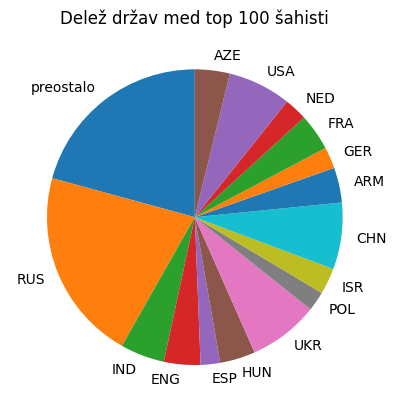

In [11]:
pogostost_drzav_pandas.plot.pie(startangle=90)
plt.title('Delež držav med top 100 šahisti')
plt.ylabel('')
plt.show()

Lotimo se še druge točke: kakšna je povezava med šahistovo državo ter njegovim ratingom?

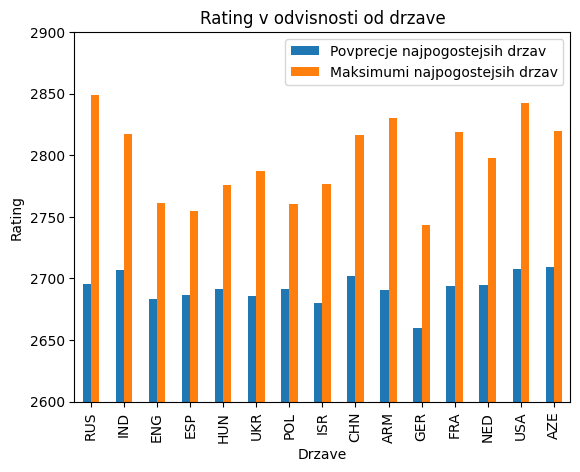

In [24]:
#V prejšnji celici smo konstruirali slovar, v katerem drzave kazejo na prazne sezname - klice se drzave

def ustvarjalec_drzav(slovar):
    for ime_sahista, leto_rojstva in sahisti_prebrano.iterrows():
        prebrana_datoteka = pd.read_csv(funkcije.ime_v_pot(ime_sahista))
        for indeks, vrstica in prebrana_datoteka.iterrows():
            slovar[vrstica['drzava']].append(vrstica['rating'])
    return slovar

def ustvarjalec_maksimumom_drzav(slovar):
    maksimumi_drzave = {}
    for drzava, ratingi in slovar.items():
        maksimumi_drzave[drzava] = max(ratingi)
    return maksimumi_drzave

drzave = ustvarjalec_drzav(drzave)

drzave_nad_mejo_info = {}
for drzava, info in drzave.items():
    if drzava in drzave_nad_mejo:
        drzave_nad_mejo_info[drzava] = info

drzave_nad_mejo_v_povprecju = kalkulator_povprecja(drzave_nad_mejo_info)

drzave_nad_mejo_maksimumi = ustvarjalec_maksimumom_drzav(drzave_nad_mejo_info)


drzave_nad_mejo_v_povprecju_df = pd.DataFrame({'Povprecje najpogostejsih drzav': drzave_nad_mejo_v_povprecju, 'Maksimumi najpogostejsih drzav' : drzave_nad_mejo_maksimumi})

drzave_nad_mejo_v_povprecju_df.plot(kind = 'bar')

plt.ylim(2600, 2900)
plt.title('Rating v odvisnosti od drzave')
plt.xlabel('Drzave')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [25]:
#Ker bomo analizirali starost pri kateri igralci dosežejo maksimalni rating v odvisnosti od države, moramo pobrati tudi podatke o slednjem.
#Pojavi se vprašanje kaj storiti, če šahist v svoji karieri igra za več kot eno državo. V okviru tega projekta bomo vse dosežke tega šahista upoštevali pod državo za katero je igral najprej.

stevec_drzav = {}
sahisti_elo = []

for ime_datoteke in os.listdir(pot_globoka):
    ime_sahista = ime_datoteke.replace('_', ' ')
    trenutni_maksimum = [('01-2000', 0)]
    datotecna_pot = os.path.join(pot_globoka, ime_datoteke)
    podatki = pd.read_csv(datotecna_pot, index_col = 'datum', sep = ',')
    for datum, vrstica in podatki.iterrows():
        rating = int(vrstica['rating'])
        if rating > trenutni_maksimum[0][1]:
            trenutni_maksimum = [(str(datum), rating)]
        elif rating == trenutni_maksimum[0][1]:
            trenutni_maksimum.append((str(datum), rating))
    drzava = vrstica['drzava']
    if drzava in stevec_drzav.keys():
        stevec_drzav[drzava] += 1
    else:
        stevec_drzav[drzava] = 1
    sahisti_elo.append({'Ime': ime_sahista, 'Maksimumi' : trenutni_maksimum, 'Drzava' : vrstica['drzava']})
#sahisti_elo je seznam slovarjev, vsebujoc informacje o imenu, najvišjem ratnigu (oz pri kateri starosti ga je dosegel) ter državljanstvu 

print(sahisti_elo)
print(stevec_drzav)

#Sedaj bomo v seznam slovarjev sahisti_elo za vsakega šahista dodali še starost, pri kateri je dosegel maksimalni rating, če je teh več pa več starosti.
sahisti_csv_format = pd.read_csv(os.path.join(pot_plitka, 'sahisti'), sep=',')

for sahist in sahisti_elo:
    ime_sahista = sahist['Ime']
    maksimumi = sahist['Maksimumi']
    sahist['Najvišji rating'] = maksimumi[0][1]
    sahist['Starosti ob najvišjih ratingih'] = []
    #Opomnik: Maksimumi je seznam nizov dveh podatkov, prvi je datum, drugi pa maksimalni elo šahista
    for indeks, vrstica in sahisti_csv_format.iterrows():
        if vrstica['Ime'] == ime_sahista:
            sahist['Leto rojstva'] = vrstica['Leto rojstva']
    for maksimum in maksimumi:
        sahist['Starosti ob najvišjih ratingih'].append(int(maksimum[0][3:]) - sahist['Leto rojstva'])
    sahist['Povprečna starost pri najvišjem ratingu'] = round(mean(sahist['Starosti ob najvišjih ratingih']), 1)
    sahist['Najmlajša starost pri najvišjem ratingu'] = min(sahist['Starosti ob najvišjih ratingih'])
    sahist['Največja starost pri najvišjem ratingu'] = max(sahist['Starosti ob najvišjih ratingih'])
sahisti_elo_pandas = pd.DataFrame(sahisti_elo, columns=['Ime', 'Leto rojstva','Drzava', 'Najvišji rating', 'Povprečna starost pri najvišjem ratingu', 'Najmlajša starost pri najvišjem ratingu', 'Največja starost pri najvišjem ratingu'])

sahisti_elo_pandas.head(250)

[{'Ime': 'Abasov, Nijat', 'Maksimumi': [('10-2023', 2679), ('11-2023', 2679)], 'Drzava': 'AZE'}, {'Ime': 'Abdusattorov, Nodirbek', 'Maksimumi': [('07-2024', 2769)], 'Drzava': 'UZB'}, {'Ime': 'Acs, Peter', 'Maksimumi': [('01-2003', 2623)], 'Drzava': 'HUN'}, {'Ime': 'Adams, Michael', 'Maksimumi': [('09-2013', 2761), ('03-2017', 2761), ('04-2017', 2761)], 'Drzava': 'ENG'}, {'Ime': 'Adhiban, B', 'Maksimumi': [('04-2019', 2701), ('05-2019', 2701)], 'Drzava': 'IND'}, {'Ime': 'Adianto, Utut', 'Maksimumi': [('07-2001', 2598)], 'Drzava': 'INA'}, {'Ime': 'Afromeev, Vladimir', 'Maksimumi': [('10-2007', 2646), ('01-2008', 2646), ('04-2008', 2646), ('07-2008', 2646)], 'Drzava': 'RUS'}, {'Ime': 'Agrest, Evgenij', 'Maksimumi': [('01-2004', 2616)], 'Drzava': 'SWE'}, {'Ime': 'Akobian, Varuzhan', 'Maksimumi': [('06-2017', 2673)], 'Drzava': 'USA'}, {'Ime': 'Akopian, Vladimir', 'Maksimumi': [('07-2006', 2713), ('10-2006', 2713), ('10-2007', 2713)], 'Drzava': 'ARM'}, {'Ime': 'Aleksandrov, Aleksej', 'Maksim

,Ime,Leto rojstva,Drzava,Najvišji rating,Povprečna starost pri najvišjem ratingu,Najmlajša starost pri najvišjem ratingu,Največja starost pri najvišjem ratingu
0,"Abasov, Nijat",1995,AZE,2679,28.0,28,28
1,"Abdusattorov, Nodirbek",2004,UZB,2769,20.0,20,20
2,"Acs, Peter",1981,HUN,2623,22.0,22,22
3,"Adams, Michael",1971,ENG,2761,44.7,42,46
4,"Adhiban, B",1992,IND,2701,27.0,27,27
...,...,...,...,...,...,...,...
245,"Nepomniachtchi, Ian",1990,RUS,2795,33.0,33,33
246,"Neverov, Valeriy",1964,UKR,2601,38.0,38,38
247,"Nguyen, Ngoc Truong Son",1990,VIE,2662,23.8,21,25
248,"Nguyen, Thai Dai Van",2001,CZE,2659,22.0,22,22


Uspešno smo sestavili razpredelnico, ki vsebuje imena vseh šahistov, leta rojstva, njihove najvišje ratinge ter povprečno starost pri najvišjem ratingu.
Zanima nas, pri kateri starosti šahisti v splošnem dosežejo svojo najvišji rating.

Da bi to analizirali uspešno moramo upoštevati še dejstvo, da nekateri igralci še niso dosegli svojega najvišjega ratinga; oz. ga trenutno dosegajo. Prvega faktorja žal ne moramo odpraviti, saj ne znamo predvideti, ali bo posameznik v prihodnosti postal boljši, slabši ali pa če bo celo nehal igrati šah na profesionalnem nivoju. Drugi faktor pa bomo nagovorili tako, da iz statistične analize eliminiramo vse igralce, ki so svoj najvišji rating dosegli v zadnjih 6 mesecih.

Carlsen, Magnus [('05-2014', 2882), ('08-2019', 2882)]
Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno 31.28. 
Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.


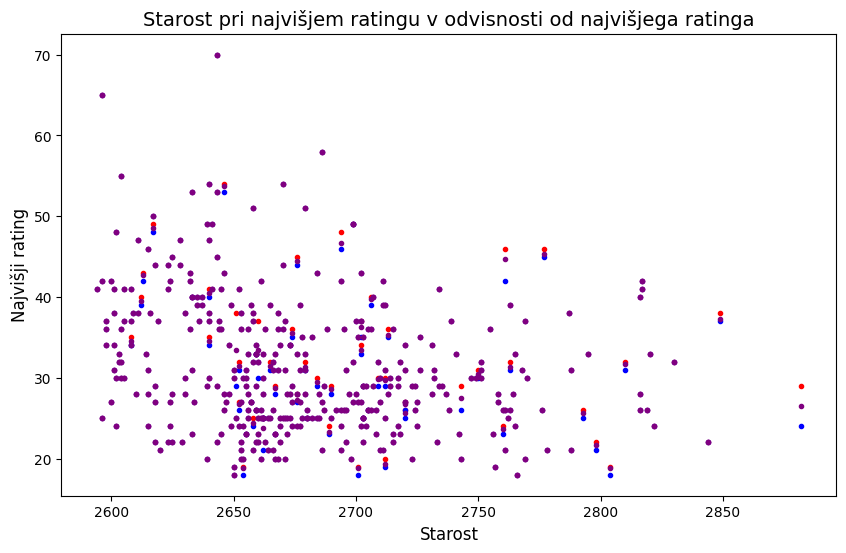

In [27]:
shp = sahisti_elo_pandas
shp = shp[shp['Povprečna starost pri najvišjem ratingu'] - (2024 - shp['Leto rojstva']) <= 0.5]

for sahist in sahisti_elo:
    if sahist['Najvišji rating'] > 2850:
        print(sahist['Ime'], sahist['Maksimumi'])

print(f'Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno {round(mean(shp['Povprečna starost pri najvišjem ratingu']), 2)}. \nBralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.')
#Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.

plt.figure(figsize=(10,6))
plt.scatter(shp['Najvišji rating'], shp['Največja starost pri najvišjem ratingu'], label='Največja starost pri najvišjem ratingu v odvisnosti od ratinga', color='red', marker='.')
plt.scatter(shp['Najvišji rating'], shp['Najmlajša starost pri najvišjem ratingu'], label='Najmlajša starost pri najvišjem ratingu v odvisnosti od ratinga', color='blue', marker='.')
plt.scatter(shp['Najvišji rating'], shp['Povprečna starost pri najvišjem ratingu'], label='Povprečna starost pri najvišjem ratingu v odvisnosti od ratinga', color='purple', marker='.')



plt.title('Starost pri najvišjem ratingu v odvisnosti od najvišjega ratinga', fontsize = 14)
plt.ylabel('Najvišji rating', fontsize=12)
plt.xlabel('Starost', fontsize=12)

plt.show()

Ugotovili smo, da je med najboljšimi 100 šahisti na svetu povprečna starost, pri kateri dosežejo svoj največji ELO rating (kar verjetno sovpada z njihovo najvišjo sposobnostjo v igri šaha), priblžno 31.24. 

Diagram prikazuje starost pri kateri igralci dosežejo svoj najvišji rating. Vijolične točke predstavljajo povprečno starost posameznika, ko je dosegel svoj najvišji rating, modra in rdeča pa zaporedoma najnižjo in najvišjo starost ko je dosegel svoj najvišji rating.

Žal ne opazimo nobenega trenda v podatkih, je pa vredno omembe, da skoraj vsi igralci dosežejo svoj najvišji rating le enkrat v življenju, ter se na isti nivo ne povzpnejo ponovno. Izjema je Magnus Carlsen, ki je svoj najvišji rating 2882 ELO dosegel 05-2014 ter 08-2019. Da je Magnus Carlsen izjema, pa ni prav veliko presenečenje.

Za glavno jed bomo analizirali trende v ELO ratingu top 5 igralcev za obdobje zadnjih 24 let. Zakaj ravno top 5? Eden izmed razlogov je, da želimo te trende grafično prikazati, kar bi bilo težko za več kot 400 šahistov, za katere imamo podatke. 

To pomeni, da bomo za vsakega igralca, ki je v zadnjih 24 letih vstopil v top 5 igralcev, zabeležili ELO rating za vsak mesec, za katerega imamo podatke(sepravi za vsak mesec, ko je bil med najboljšimi 100 šahisti na svetu). Podatke bomo grafično predstavili kot zlomljenko.